<a href="https://colab.research.google.com/github/eric-castillo05/FitForecast/blob/main/FitForecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
Weight training is an effective way to increase strength, power, and muscle mass. However, it can be difficult for people who go to the gym regularly to know how much weight they should lift on each exercise. This can lead to plateaus in progress or even injuries.

Progressive overload is a fundamental principle of weight training. It is the process of gradually increasing the amount of weight that is lifted over time. This helps muscles to adapt and grow.

# Objectives
The objective of this project is to develop a machine learning model, specifically a neural network, that can predict the date on which a person will be able to lift a given weight on a given exercise. This model will be based on training data that includes information about the person's training history, their physical characteristics, and other relevant factors.

# Benefits
This neural network-based model can benefit people who go to the gym regularly in several ways. First, it can help people to plan their workouts more effectively. This can help people to avoid plateaus and injuries. Second, the model can help people to stay motivated. When people see their progress, they are more likely to keep training.

# Methodology
The project will be divided into the following phases:

1. Data preparation: The training data will be cleaned and prepared so that it can be used by the neural network model.
2. Selection of machine learning model: Different machine learning models, with a focus on neural networks, will be evaluated to determine which is the most suitable for this task.
3. Training of the neural network model: The neural network model will be trained on the training data, leveraging its capacity to capture complex patterns.
4. Evaluation of the neural network model: The neural network model will be evaluated on the test data to determine its accuracy and effectiveness in predicting weight lifting dates.

Numpy (`import numpy as np`):
Efficient library for array manipulation and mathematical operations.

Pandas (`import pandas as pd`):
Library for tabular data manipulation and analysis.

Matplotlib (`import matplotlib.pyplot as plt`):
Visualization tool for creating graphs and visualizations.

TensorFlow (`import tensorflow as tf`):
Open-source library for developing and training machine learning models.

Scikit-Learn (`from sklearn.model_selection import train_test_split`):
Toolkit for machine learning that includes functions for splitting datasets into training and testing sets.

Keras (`from keras.models import Sequential, from keras.layers import Dense`):
High-level interface for building and training deep learning models.

Scikit-Learn (`from sklearn.metrics import f1_score, mean_absolute_error`):
Evaluation functions to compute metrics such as F1 score and mean absolute error (MAE).

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import f1_score, mean_absolute_error

# Load the data

To streamline our workflow and facilitate efficient data retrieval, we opted to upload all datasets to Google Drive. This centralized storage solution ensures convenient access to the data, which is currently organized in a CSV files.

In [17]:
df = pd.read_csv('/content/drive/MyDrive/datasets/gym_data.csv')

# Data cleaning

In [18]:
# Convert the date to a pandas-compatible format
df['fecha'] = pd.to_datetime(df['fecha'], dayfirst=True)

# Transform dates to the number of days elapsed since the minimum date in the dataset
df['fecha'] = (df['fecha'] - df['fecha'].min()).dt.days

# Drop rows with missing values
df = df.dropna()

# Separate the target variable (y) and features (X)
y = df['fecha']
X = df[["fecha", 'ejercicio', "repeticiones"]]

# Drop rows with missing values in features
X = X.dropna()

# One-hot encode categorical values (e.g., 'ejercicio')
X = pd.get_dummies(X, columns=['ejercicio'])

#  Data division

In [19]:
# Split the dataset into training and the remaining (temp) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=1)  # 60% training, 40% remaining

# Further split the remaining set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=1)  # 20% validation, 20% test

# Model Selection: Neural Network

In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

In [21]:
model.compile(optimizer='adam', loss='mse')

# Training and evaluation

In [22]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
16/16 [==============================] - 1s 16ms/step - loss: 6851.5361 - val_loss: 1502.4061
Epoch 2/100
16/16 [==============================] - 0s 6ms/step - loss: 363.8369 - val_loss: 241.4620
Epoch 3/100
16/16 [==============================] - 0s 6ms/step - loss: 156.4556 - val_loss: 2.8994
Epoch 4/100
16/16 [==============================] - 0s 5ms/step - loss: 12.4088 - val_loss: 13.0110
Epoch 5/100
16/16 [==============================] - 0s 6ms/step - loss: 3.3031 - val_loss: 2.4520
Epoch 6/100
16/16 [==============================] - 0s 6ms/step - loss: 1.3240 - val_loss: 0.4919
Epoch 7/100
16/16 [==============================] - 0s 5ms/step - loss: 0.4281 - val_loss: 0.4455
Epoch 8/100
16/16 [==============================] - 0s 6ms/step - loss: 0.2777 - val_loss: 0.3783
Epoch 9/100
16/16 [==============================] - 0s 5ms/step - loss: 0.2059 - val_loss: 0.3219
Epoch 10/100
16/16 [==============================] - 0s 5ms/step - loss: 0.1874 - val_loss: 0

In [23]:
predicciones_fecha = model.predict(X_test)

6/6 [==============================] - 0s 3ms/step


In [24]:
# Evaluate the model's performance on the test set using Mean Squared Error (MSE)
loss = model.evaluate(X_test, y_test)
print("Loss (MSE):", loss)

# Calculate the Mean Absolute Error (MAE) between actual and predicted values
mae = mean_absolute_error(y_test, predicciones_fecha)
print("MAE:", mae)

6/6 [==============================] - 0s 4ms/step - loss: 0.0020
Loss (MSE): 0.0020213103853166103
MAE: 0.029322701405329877


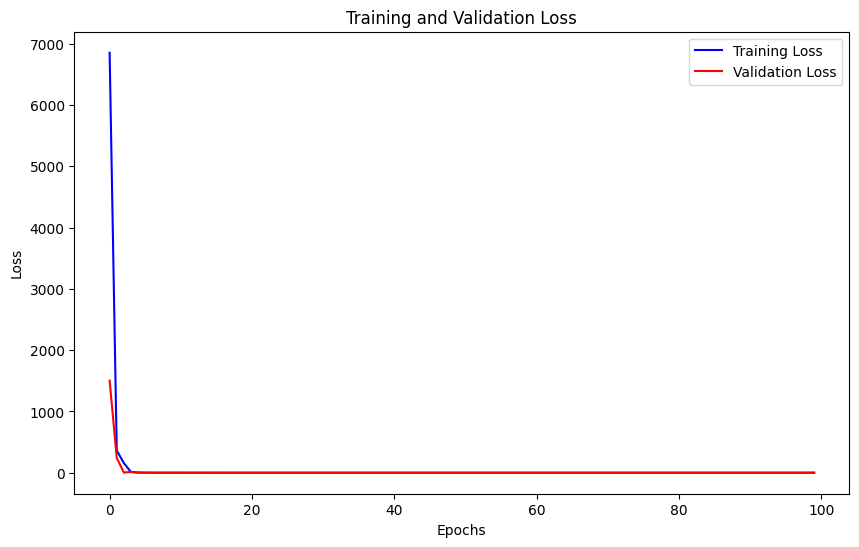

In [25]:
# Extract training and validation losses from the training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create a plot to visualize the training and validation losses
plt.figure(figsize=(10, 6))
plt.plot(train_loss, 'b', label='Training Loss')
plt.plot(val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()